# P-V特性図（ノーズカーブ）を描く
作成中のLTspiceによる三相PWM整流器において，系統の短絡容量比(SCR)が小さい場合に電圧崩壊することがあった。
これは，制御が不安定になっているためというよりも，そもそもそのような電力を授受できない条件であると考えることができる。
そこで，SCRを変えながらノーズカーブを描いて視覚的に確認してみる。

<img src="simple-grid.png" style="zoom:0.5;">

送電端電圧を$V_{s}$，送電端と受電端の間のリアクタンスを$X$，相差角を$\delta$，負荷力率角を$\phi$とすると，受電端でのノーズカーブは次式を基に描くことができる。
$$
P_{r} = \frac{V_{s}^{2}}{2 X} \frac{\sin (\phi + 2 \delta) - \sin \phi}{\cos \phi} \tag{1}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 回路定数
Vs = 400 # [V], 送電端電圧
Pnom = 200e3 # [W], 公称有効電力

# 相差角準備
delta = np.linspace(0, 180, 2000)

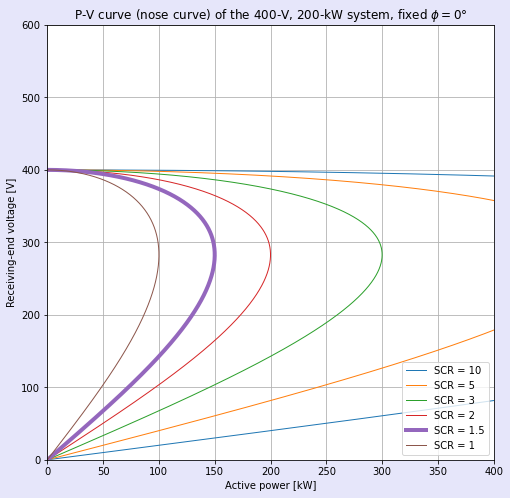

In [5]:
# プロット（SCRをパラメータとする）
## 力率角
phi = 0 # [deg], 固定した力率角

## 準備
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
fig.patch.set_facecolor('lavender')
ax.set_title(fr'P-V curve (nose curve) of the 400-V, 200-kW system, fixed $\phi = {phi} \degree$')

## 受電端電圧・電力の計算とプロット
SCRs = [10, 5, 3, 2, 1.5, 1] # 短絡容量比
for SCR in SCRs:
    X = Vs ** 2 / Pnom / SCR # [Ω], リアクタンス
    Vr = Vs * np.cos(np.deg2rad(phi + delta)) / np.cos(np.deg2rad(phi))
    Pr = Vs ** 2 / (2 * X) * (np.sin(np.deg2rad(phi + 2 * delta)) - np.sin(np.deg2rad(phi))) / np.cos(np.deg2rad(phi))
    
    ### 特定のSCRでlinewidthを変える
    if SCR in [1.5]:
        lw = 4
    else:
        lw = 1
    
    ### プロット実行
    ax.plot(Pr / 1000, Vr, label = f'SCR = {SCR}', lw = lw)

## グラフ調整
ax.set_xlim(0, 400)
ax.set_ylim(0, 600)
ax.set_xlabel('Active power [kW]')
ax.set_ylabel('Receiving-end voltage [V]')
ax.legend(loc = 'lower right')
ax.grid()

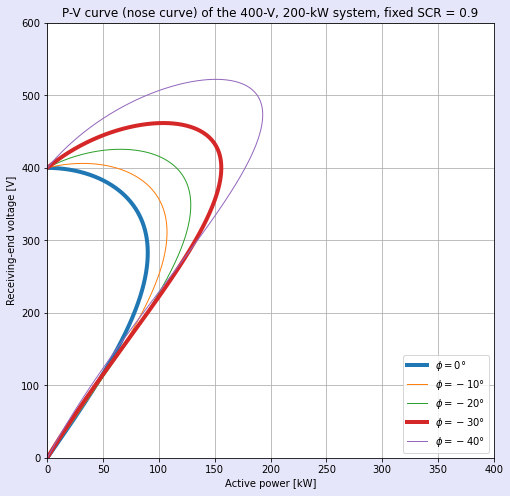

In [4]:
# プロット（力率角をパラメータとする）
## SCR
SCR = 0.9 # 固定したSCR

## 準備
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
fig.patch.set_facecolor('lavender')
ax.set_title(f'P-V curve (nose curve) of the 400-V, 200-kW system, fixed SCR = {SCR}')

## 受電端電圧・電力の計算とプロット
phis = [0, -10, -20, -30, -40] # 短絡容量比
for phi in phis:
    X = Vs ** 2 / Pnom / SCR # [Ω], リアクタンス
    Vr = Vs * np.cos(np.deg2rad(phi + delta)) / np.cos(np.deg2rad(phi))
    Pr = Vs ** 2 / (2 * X) * (np.sin(np.deg2rad(phi + 2 * delta)) - np.sin(np.deg2rad(phi))) / np.cos(np.deg2rad(phi))
    
    ### 特定の力率角でlinewidthを変える
    if phi in [0, -30]:
        lw = 4
    else:
        lw = 1
        
    ### プロット実行
    ax.plot(Pr / 1000, Vr, label = fr'$\phi = {phi} \degree$', lw = lw)

## グラフ調整
ax.set_xlim(0, 400)
ax.set_ylim(0, 600)
ax.set_xlabel('Active power [kW]')
ax.set_ylabel('Receiving-end voltage [V]')
ax.legend(loc = 'lower right')
ax.grid()